# OPTMIZACIÓN DE CURRICULUM VITAE CON PYTHON

Un ejemplo de las posibilidades que ofrece la Ciencia de Datos en el Análisis de Texto.

## EL PROBLEMA
Nos interesa evaluar qué tan bien se ajusta un perfil a una vacante de trabajo. Usaremos python para identificar las palabras más importantes en la descripción de la vacante y comparar con las palabras más frecuentes en el perfil del candidato. 

## ANÁLISIS

Importamos las librerías a utilizar.

In [104]:
# Librerías básicas para Análisis numérico
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Librerías para procesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.stem import SnowballStemmer
from wordcloud import WordCloud

Importamos el texto. Si incluímos varias descripciones de puesto, deben estar separadas por tres asteriscos sucesivos.

In [105]:
texto_jobs = '''
Undergraduate degree in computer science, applied math, statistics, engineering or related quantitative field; Master's or PhD degree in computer science, artificial intelligence, applied statistics or mathematics is a plus1-7 years of technical and management experience in distributed computing, machine learning and statistics-related work preferably within heavy industry, basic materials (e.g. metals & mining) or service industriesTechnical experience in predictive analytics, deep learning, machine learning, data mining and/or optimization in an operations-related field (e.g. manufacturing, supply chain, procurement, workforce management and/or fleet scheduling)Experience in defining and/or implementing digital strategies and analytics across all stages of the value chain is a plus Ability to independently own and drive model development, balancing demands and deadlinesAbility to prototype statistical analysis and modeling algorithms and apply these algorithms for data driven solutions to problems in new domainsProgramming experience in R and/or Python are a must; SQL is a plusKnowledge of Tableau/PowerBIStrong communication skills especially around breaking down complex structures into digestible and relevant points for a diverse set of clients and colleaguesSkills to communicate complex ideas effectively, both verbally and written, in English and SpanishWillingness to travel up to 80%
'''

Convertimos nuestro texto en un DataFrame con cada descripción de puesto en una fila:

In [106]:
df = pd.DataFrame(texto_jobs.split('***'), columns=['descripcion'])

# df.info()
# df.head()

**¿Cuántas descripciones de puesto hay en nuestra lista?**

In [107]:
num_elementos = df.shape[0]
print('Respuesta: la lista contiene ', num_elementos, 'elemento(s).')

Respuesta: la lista contiene  1 elemento(s).


Ingresamos el texto de nuestro perfil

In [108]:
texto_perfil = '''

'''

## CÓMO GENERAR NUBES DE PALABRAS

Definimos la función crear_nube():

In [109]:
def crear_nube(text='texto_jobs'):
    #Lista de stopwords
    stopwords_list = stopwords.words('english')
    # Crear y generar una nube de palabras:
    wordcloud = WordCloud(stopwords=stopwords_list, max_font_size=50,background_color='white',width=800, height=400).generate(text)

    # Mostrar la nube de palabras:
    fig, ax = plt.subplots(figsize=(20,10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

Para obtener la nube de palabras del conjunto de muestras, concatenamos todas las descripciones de puesto.

In [110]:
text_all = df.descripcion.str.cat()

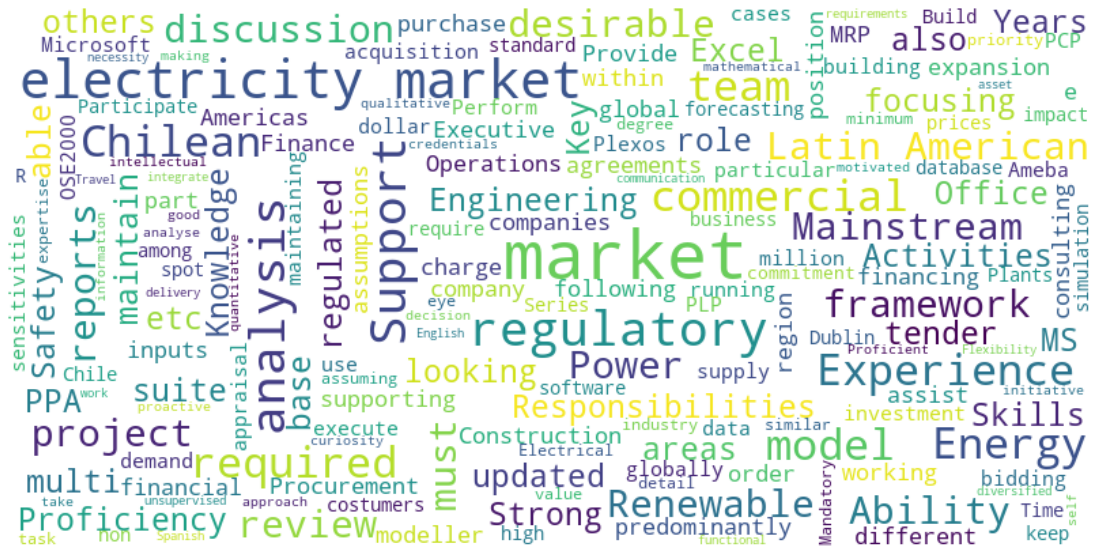

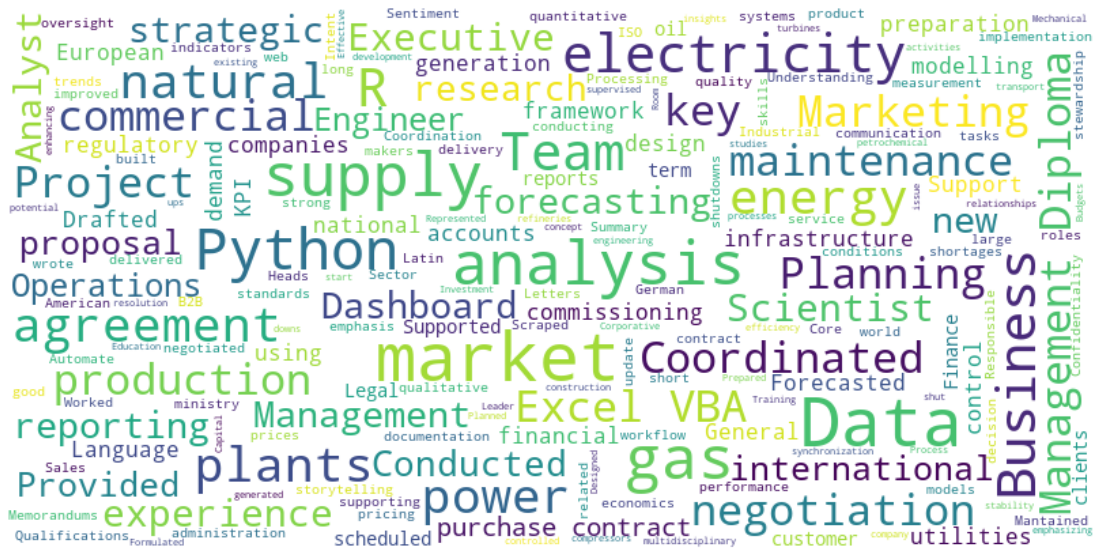

In [111]:
crear_nube(text_all)
crear_nube(texto_perfil)

## CÓMO GENERAR UN HISTOGRAMA HORIZONTAL CON LAS n PALABRAS MÁS FRECUENTES

Ingrese el nombre del puesto:  
Ingrese el número de palabras a graficar: 20


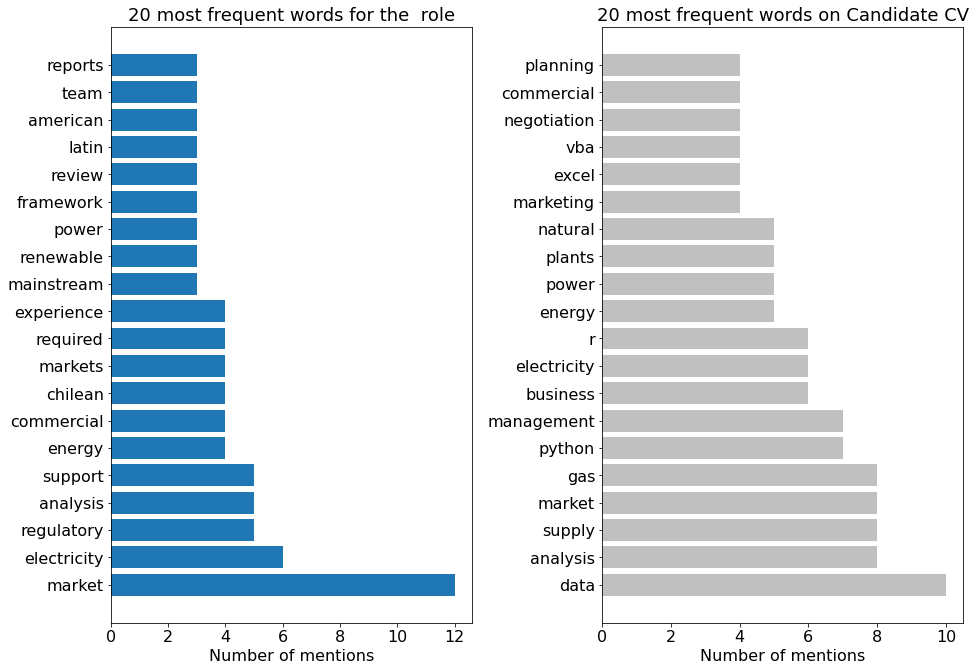

In [114]:
# Get Input
rol = input('Ingrese el nombre del puesto: ')
n = int(input('Ingrese el número de palabras a graficar:'))

# Find most common words(vacante)
q1_str = df.descripcion.str.cat(sep = ' ')
stopwords_list = stopwords.words('english')
list_of_words = [i.lower() for i in wordpunct_tokenize(q1_str) if i.lower() not in stopwords_list and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(n)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.tight_layout() 

# Plot 1
ax1.barh(range(len(mostcommon)),[val[1] for val in mostcommon], align='center')
plt.sca(ax1)
plt.title(f'{n} most frequent words for the {rol} role', fontsize=18)
plt.xlabel('Number of mentions', fontsize=16)
plt.yticks(range(len(mostcommon)), [val[0] for val in mostcommon])
fig.set_size_inches([14, 10])
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

# Find most common words(perfil)
q2_str = texto_perfil
list_of_words2 = [i.lower() for i in wordpunct_tokenize(q2_str) if i.lower() not in stopwords_list and i.isalpha()]
wordfreqdist = nltk.FreqDist(list_of_words2)
mostcommon2 = wordfreqdist.most_common(n)

# Plot 2
ax2.barh(range(len(mostcommon2)),[val[1] for val in mostcommon2], align='center', color='silver')
plt.sca(ax2)
plt.title(f'{n} most frequent words on Candidate CV', fontsize=18)
plt.xlabel('Number of mentions', fontsize=16)
plt.yticks(range(len(mostcommon2)), [val[0] for val in mostcommon2])
fig.set_size_inches([14, 10])
plt.rc('ytick', labelsize=16)
plt.rc('xtick', labelsize=16)

plt.show()

## CÓMO ENCONTRAR LAS PALABRAS COMUNES EN AMBOS GRUPOS Y EL % DE PALABRAS EN COMUN

In [115]:
# Creagte list of common words and calculate index:
palabras_en_vacante =[mostcommon[i][0] for i in range(len(mostcommon))]
palabras_en_cv = [mostcommon2[i][0] for i in range(len(mostcommon2))] 
common = []
for word in palabras_en_cv:
   if word in palabras_en_vacante:
       common.append(word) 

ratio = float('{:.1f}'.format(100 * len(common) / n))        
print('% words in common: ', index,'\n'*2,'words in common:', common, '\n')

if ratio >= 75:
    print('Good Fit for the position')
elif ratio >= 50 <75: 
    print('Regular Fit for the position')
else:
    print('Bad Fit for the position')

% words in common:  30.0 

 words in common: ['analysis', 'market', 'electricity', 'energy', 'power', 'commercial'] 

Bad Fit for the position


## CÓMO SABER SI UNA PALABRA ESPECÍFICA APARECE ENTRE LAS N MÁS FRECUENTES EN EL TEXTO DE LA VACANTE

In [130]:
wordfreqdist = nltk.FreqDist(list_of_words)
mostcommon = wordfreqdist.most_common(n)
word = str(input('word:')).lower()
word_found=False
for i in range(len(mostcommon)):
    if word == mostcommon[i][0]:
        print(f'La palabra {word} es la número {i+1} en la lista de las primeras {n}, con {mostcommon[i][1]} apariciones.')
        word_found = True
if not word_found:
    print(f'La palabra "{word}" no aparece entre las primeras {n} palabras más frecuentes en el texto de la vacante.')

word: analysis


La palabra analysis es la número 4 en la lista de las primeras 20, con 5 apariciones.
